In [15]:
import pandas as pd

df = pd.read_csv('cleaned_stock_prices_csv.csv')
df

,Unnamed: 0,Date,Close/Last,Volume,Open,High,Low
0,0,2022-01-28,170.3300,179935700,165.7100,170.3500,162.8000
1,1,2022-01-27,159.2200,121954600,162.4500,163.8400,158.2800
2,2,2022-01-26,159.6900,108275300,163.5000,164.3894,157.8200
3,3,2022-01-25,159.7800,115798400,158.9800,162.7600,157.0200
4,4,2022-01-24,161.6200,162706700,160.0200,162.3000,154.7000
...,...,...,...,...,...,...,...
2513,2513,2012-02-03,16.4171,286475725,16.3321,16.4286,16.2700
2514,2514,2012-02-02,16.2543,186460101,16.2821,16.3275,16.2136
2515,2515,2012-02-01,16.2925,269077484,16.3718,16.3925,16.2696
2516,2516,2012-01-31,16.3029,391497243,16.2711,16.3657,16.1811


In [16]:
df = df[['Date','Close/Last', 'Volume', 'Open', 'High', 'Low']]
df

,Date,Close/Last,Volume,Open,High,Low
0,2022-01-28,170.3300,179935700,165.7100,170.3500,162.8000
1,2022-01-27,159.2200,121954600,162.4500,163.8400,158.2800
2,2022-01-26,159.6900,108275300,163.5000,164.3894,157.8200
3,2022-01-25,159.7800,115798400,158.9800,162.7600,157.0200
4,2022-01-24,161.6200,162706700,160.0200,162.3000,154.7000
...,...,...,...,...,...,...
2513,2012-02-03,16.4171,286475725,16.3321,16.4286,16.2700
2514,2012-02-02,16.2543,186460101,16.2821,16.3275,16.2136
2515,2012-02-01,16.2925,269077484,16.3718,16.3925,16.2696
2516,2012-01-31,16.3029,391497243,16.2711,16.3657,16.1811


<ipython-input-22-0fb3a40345c7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')


<Figure size 1152x576 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

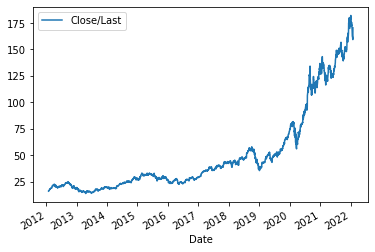

In [22]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
import numpy as np
import matplotlib.pyplot as plt


df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
plt.figure(figsize = (16,8))

plt.figure(figsize=(20, 20))
df.plot.line(x = 'Date', y = 'Close/Last')
plt.show()

In [24]:
data =  df.sort_index(ascending=True, axis =0)
new_df = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close/Last'])

for i in range(0, len(data)):
    new_df['Date'][i] = data['Date'][i]
    new_df['Close/Last'][i] = data['Close/Last'][i]
    
new_df.shape

(2518, 2)

In [26]:
scaler = MinMaxScaler(feature_range=(0, 1))
final_df = new_df.values

train_data = final_df[0:2014, :]
test_data = final_df[2014:, :]

test_data

array([[17.8494],
       [17.8839],
       [18.0893],
       [19.6607],
       [19.5025],
       [19.8636],
       [19.6968],
       [19.6097],
       [19.3097],
       [19.7947],
       [19.9057],
       [19.5139],
       [19.1332],
       [19.0336],
       [19.1614],
       [19.4093],
       [19.2871],
       [19.4261],
       [19.3207],
       [19.7547],
       [20.0364],
       [19.8043],
       [20.0032],
       [20.1393],
       [20.2739],
       [20.3604],
       [19.6079],
       [19.445],
       [19.6704],
       [19.8211],
       [19.9107],
       [19.8011],
       [20.0193],
       [20.0486],
       [20.1982],
       [20.2297],
       [20.0007],
       [20.2822],
       [20.1786],
       [20.2258],
       [19.6868],
       [19.8597],
       [19.4986],
       [19.05],
       [18.705],
       [18.5643],
       [18.612],
       [18.3929],
       [18.5554],
       [18.5225],
       [18.7497],
       [18.8629],
       [18.5941],
       [18.5718],
       [18.5374],
       [18.5914